In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.metrics import accuracy_score


In [3]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head(10)
categorical_variables = data[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_variables = data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine",\
                             "serum_sodium","time"]]

In [4]:
#checking null values
data.isna().sum()

data.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

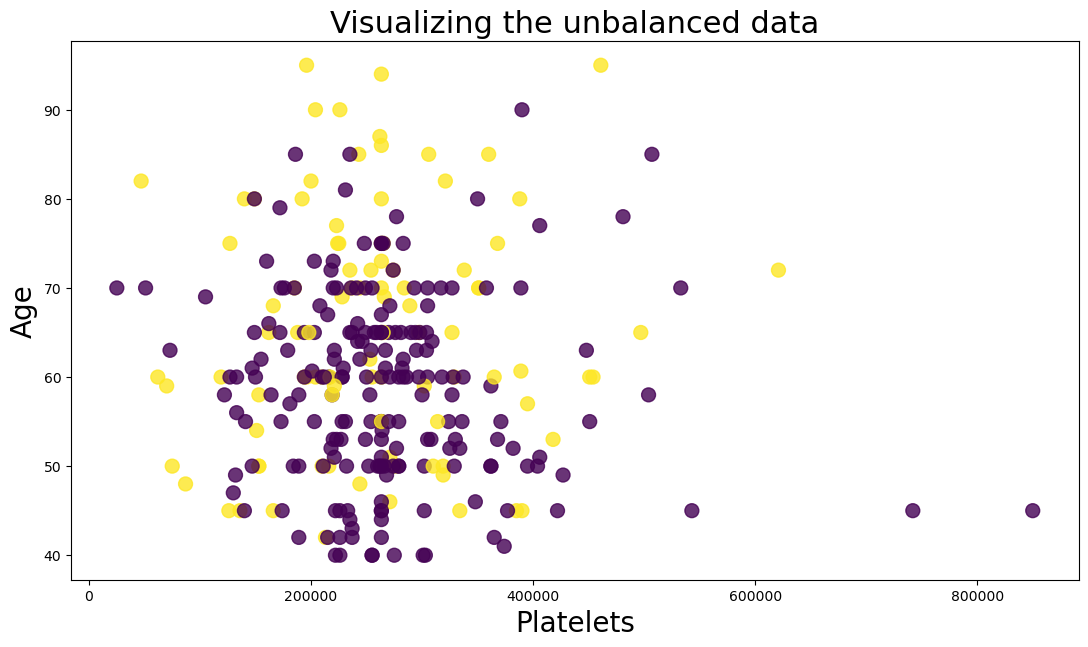

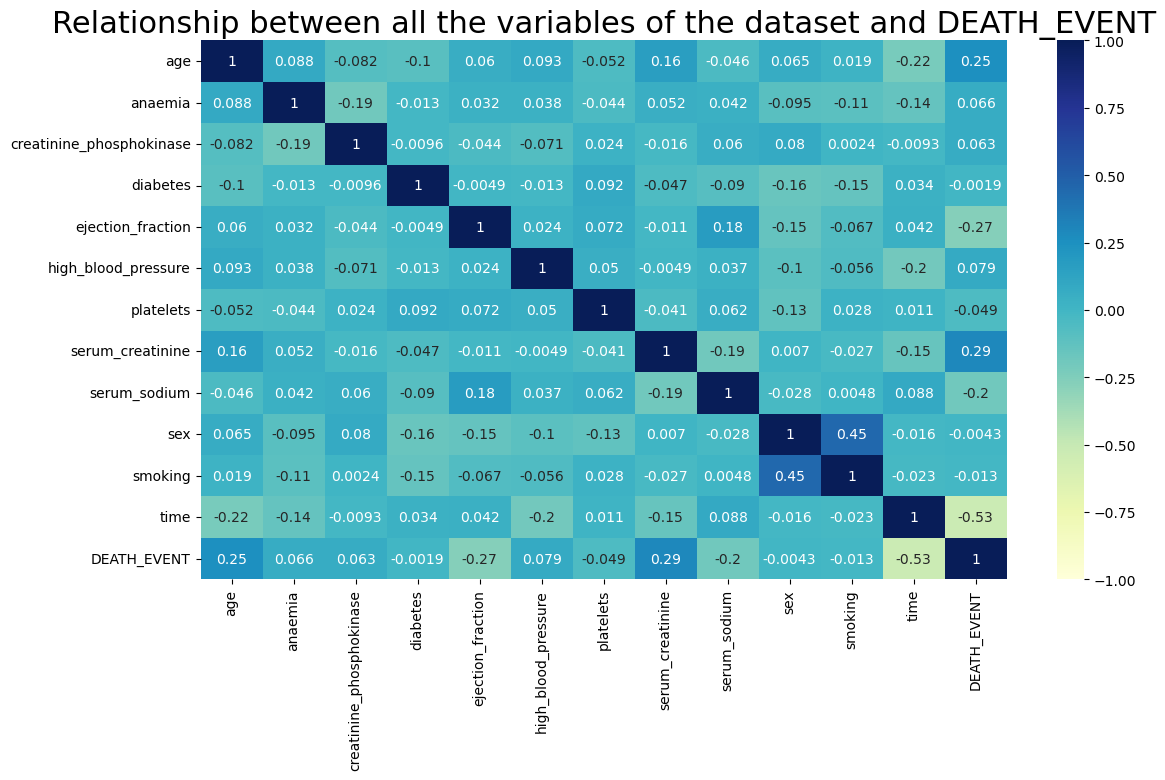

In [5]:
#data description
continuous_variables.describe()
data.groupby("DEATH_EVENT").count()
age = data[["age"]]
platelets = data[["platelets"]]

#visualizing unbalanced data
plt.figure(figsize=(13,7))
plt.scatter(platelets, age, c = data["DEATH_EVENT"], s=100, alpha=0.8)
plt.xlabel("Platelets", fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.title("Visualizing the unbalanced data", fontsize=22)
plt.show()

plt.figure(figsize=(13,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.title("Relationship between all the variables of the dataset and DEATH_EVENT", fontsize = 22)
plt.show()
#DATA VISUALIZATIN

categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
continuous_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine",\
                             "serum_sodium","time"]

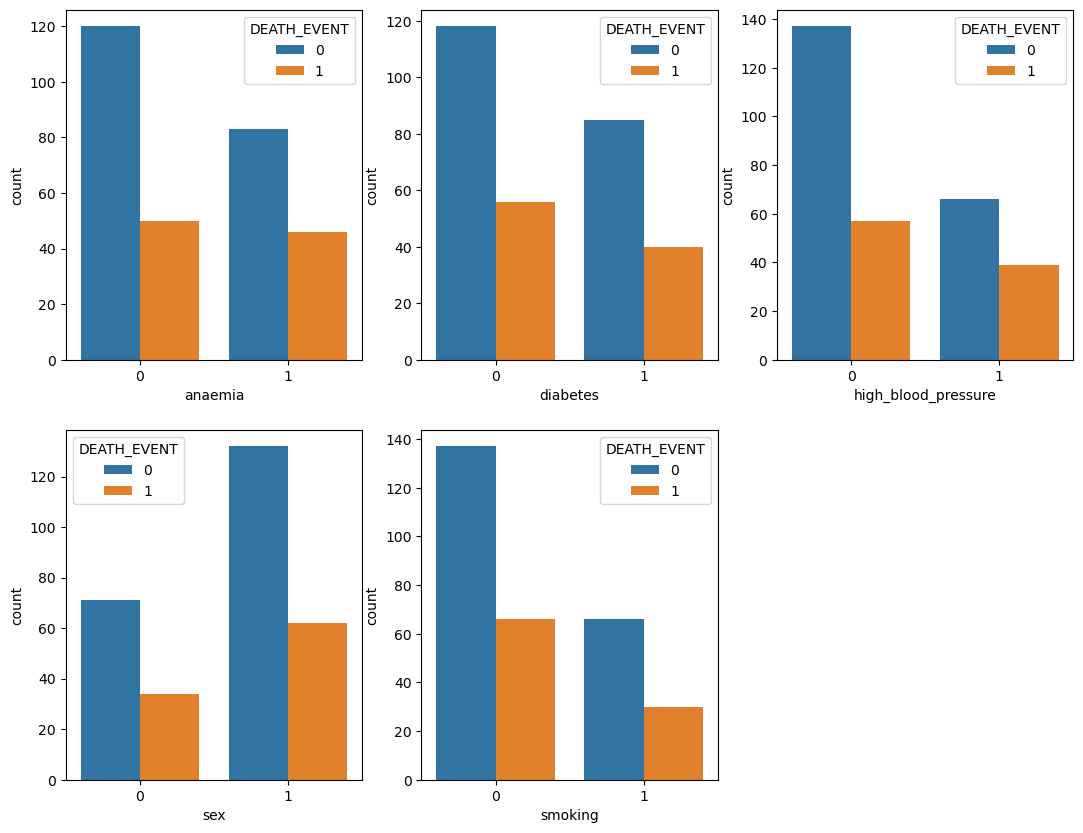

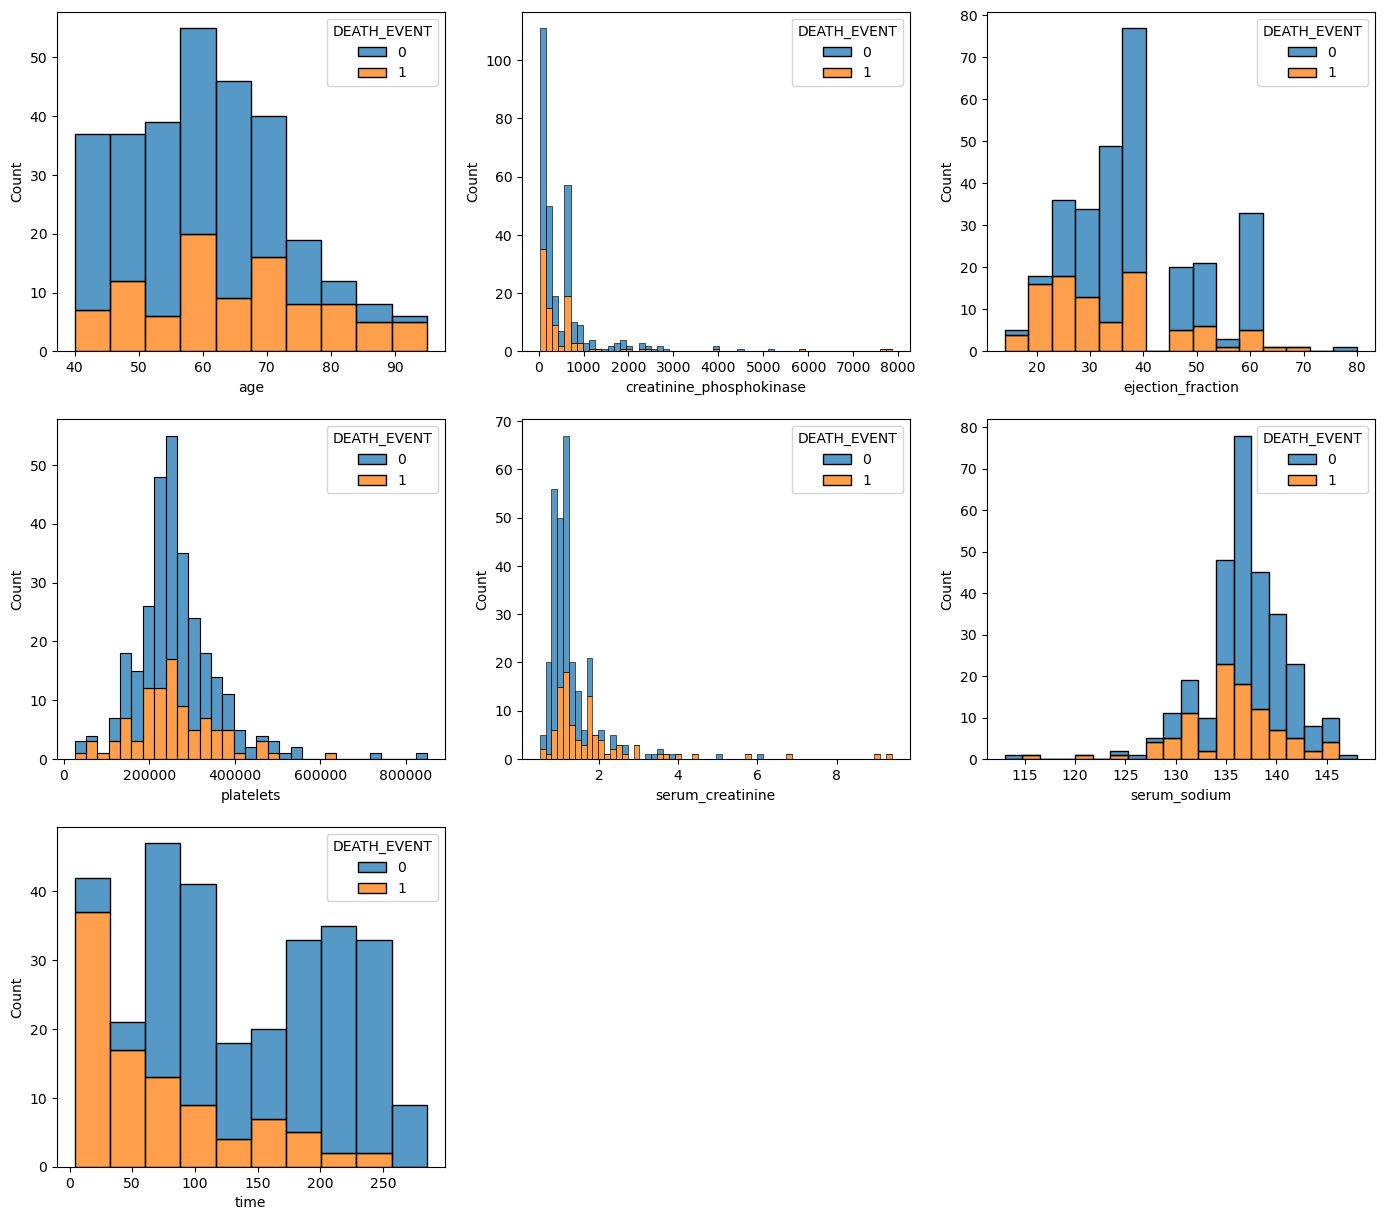

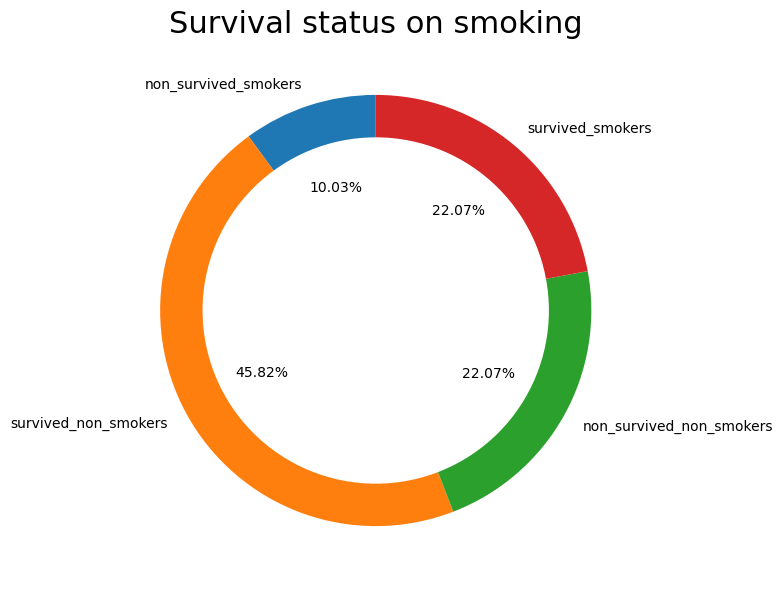

In [7]:
# Plotting the impact of categorical variables on DEATH_EVENT

plt.figure(figsize=(13,10))
for i,cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data = data, x= cat, hue = "DEATH_EVENT")
plt.show()

# Plotting the impact of continuous variables on DEATH_EVENT

plt.figure(figsize=(17,15))
for j,con in enumerate(continuous_data):
    plt.subplot(3,3,j+1)
    sns.histplot(data = data, x= con, hue = "DEATH_EVENT", multiple="stack")
plt.show()

# Analyzing the survival status on smoking

smokers = data[data["smoking"]==1]
non_smokers = data[data["smoking"]==0]

non_survived_smokers = smokers[smokers["DEATH_EVENT"]==1]
survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==1]
survived_smokers = smokers[smokers["DEATH_EVENT"]==0]

smoking_data = [len(non_survived_smokers), len(survived_non_smokers),len(non_survived_non_smokers),len(survived_smokers)]
smoking_labels = ["non_survived_smokers", "survived_non_smokers", "non_survived_non_smokers", "survived_smokers"]

plt.figure(figsize=(7,7))
plt.pie(smoking_data, labels = smoking_labels, autopct='%.2f%%', startangle=90)
circle = plt.Circle((0,0), 0.8, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on smoking", fontsize=22)
plt.show()



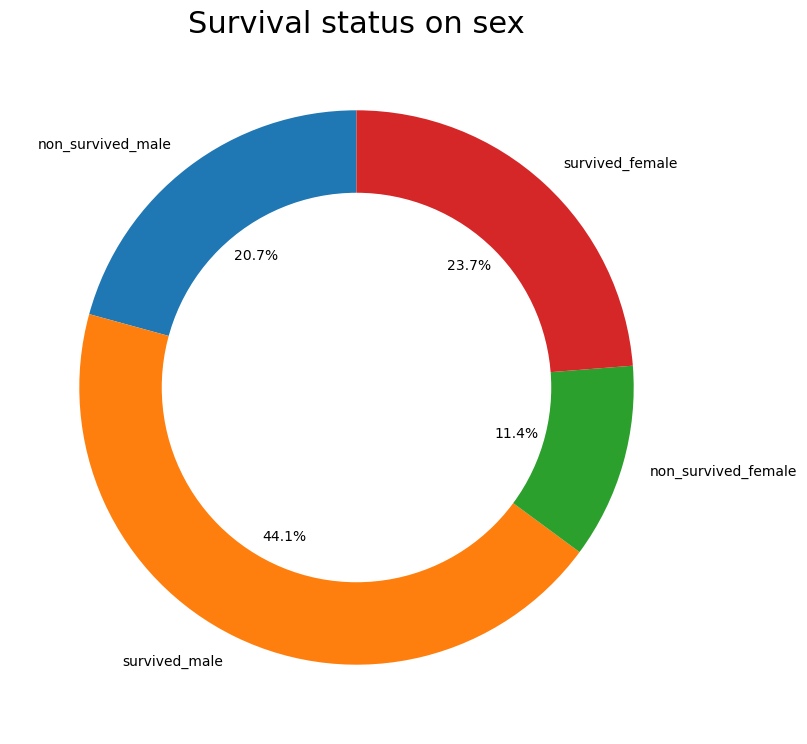

In [8]:
# Analyzing the survival status on sex

male = data[data["sex"]==1]
female = data[data["sex"]==0]

non_survived_male = male[male["DEATH_EVENT"]==1]
survived_male = male[male["DEATH_EVENT"]==0]
non_survived_female = female[female["DEATH_EVENT"]==1]
survived_female = female[female["DEATH_EVENT"]==0]

sex_data = [len(non_survived_male), len(survived_male), len(non_survived_female),len(survived_female)]
sex_labels = ["non_survived_male","survived_male","non_survived_female","survived_female"]

plt.figure(figsize=(9,9))
plt.pie(sex_data, labels = sex_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on sex", fontsize=22)
plt.show()




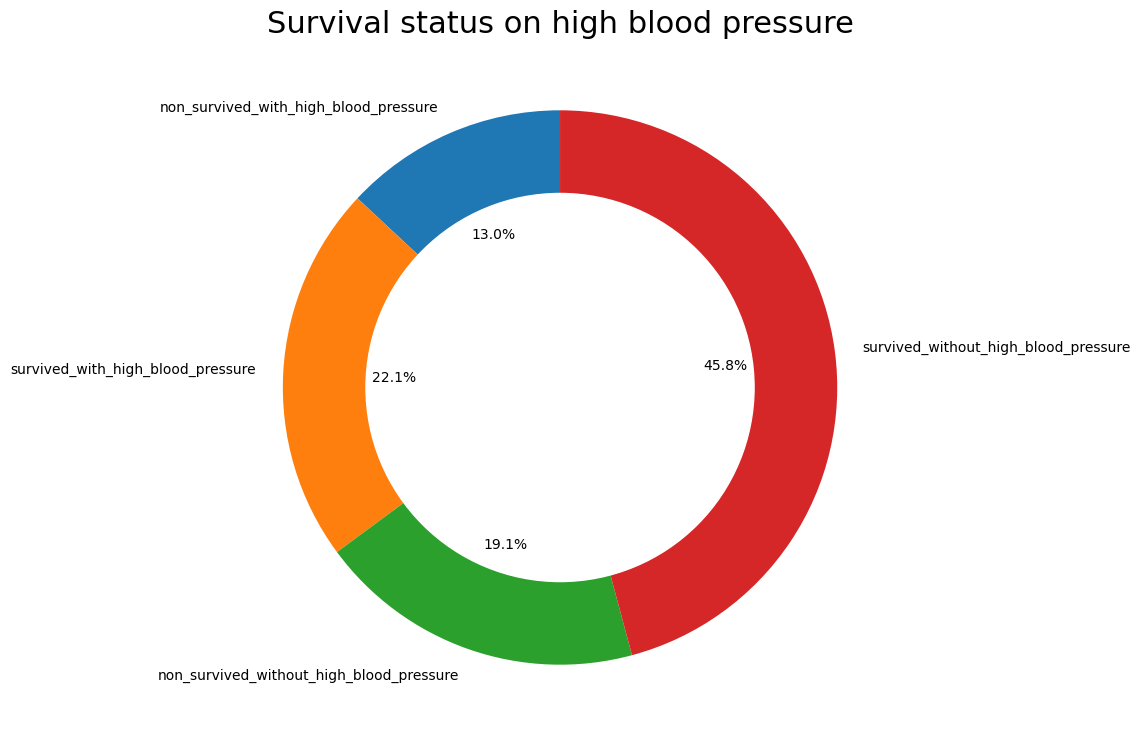

In [9]:
# Analyzing the survival status on high blood pressure

with_high_blood_pressure = data[data["high_blood_pressure"]==1]
without_high_blood_pressure = data[data["high_blood_pressure"]==0]

non_survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==1]
survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==0]
non_survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==1]
survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==0]

high_blood_pressure_data = [len(non_survived_with_high_blood_pressure), len(survived_with_high_blood_pressure), \
                            len(non_survived_without_high_blood_pressure), len(survived_without_high_blood_pressure)]

high_blood_pressure_labels = ["non_survived_with_high_blood_pressure","survived_with_high_blood_pressure",\
                   "non_survived_without_high_blood_pressure","survived_without_high_blood_pressure"]

plt.figure(figsize=(9,9))
plt.pie(high_blood_pressure_data, labels = high_blood_pressure_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on high blood pressure", fontsize=22)
plt.show()

In [10]:
#Data modeling 
x_continuous = data[["age", "creatinine_phosphokinase", "ejection_fraction", "serum_creatinine", "serum_sodium", "time"]]
x_categorical = data[["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]]
y = data["DEATH_EVENT"]

# One-hot encode categorical variables
x_categorical_encoded = pd.get_dummies(x_categorical, columns=["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"])

# Concatenate continuous and encoded categorical features
x = pd.concat([x_continuous, x_categorical_encoded], axis=1)


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

# Data scaling
scaler = StandardScaler()


x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [11]:
# Model training and evaluation
models = [
    ("Logistic Regression", LogisticRegression()),
    ("SVC", SVC()),
    ("Decision Tree", DecisionTreeClassifier(criterion="entropy", max_depth=2)),
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier())
]

accuracy_list = []

# Initialize random_forest_model to None
random_forest_model = None

for model_name, model in models:
    # Training the model
    model.fit(x_train_scaled, y_train)

    # Make predictions
    predictions = model.predict(x_test_scaled)

    # Evaluate accuracy
    accuracy = round(accuracy_score(predictions, y_test) * 100, 2)
    accuracy_list.append((model_name, accuracy))


    if model_name == "Random Forest":
        random_forest_model = model  
        joblib.dump(scaler, "standard_scaler.joblib")
        joblib.dump(random_forest_model, "random_forest_model.joblib")


for model_name, accuracy in accuracy_list:
    print(f"{model_name}: {accuracy}%")

joblib.dump(scaler, "standard_scaler.joblib")


Logistic Regression: 87.78%
SVC: 86.67%
Decision Tree: 88.89%
Naive Bayes: 78.89%
Random Forest: 90.0%


['standard_scaler.joblib']